In [1]:

from enviroments.tradingEnviroment import TradingEnv
from conf import get_train_config
import numpy as np
from collections import deque

import torch


In [2]:
args, setting = get_train_config()

args.initial_balance = 10_000

In [3]:
print(args)
print(args.scale)
args.seq_len = args.sequence_len



{'is_training': 1, 'model_id': 'test', 'model': 'Autoformer', 'data': 'sp100', 'root_path': 'data', 'data_path': 'sp100_combined_close.csv', 'features': 'M', 'target': 'M', 'frequency': 'D', 'freq': 'd', 'checkpoints': './autoformer_checkpoints/', 'sequence_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 98, 'dec_in': 98, 'c_out': 98, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'moving_avg': 50, 'faction': 1, 'distil': True, 'dropout': 0.05, 'activation': 'gelu', 'output_attention': True, 'do_predict': None, 'num_workers': 1, 'itr': None, 'train_epochs': 10, 'batch_size': 32, 'patience': 3, 'learning_rate': 0.0001, 'des': 'train', 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'use_gpu': False, 'gpu': None, 'use_multi_gpu': False, 'devices': None, 'embed': 'timeF', 'factor': 3, 'initial_balance': 10000}
None


In [4]:
from data_provider.data_factory import data_provider

_, train_loader =data_provider(args, flag='train')

args.scale = False
env = TradingEnv(args, flag='test')

(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
train 1993
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted


In [5]:
from agents.basicStrategies import basicStrategy, buyAndHoldStrategy, rankedStrategy
from models.denseModel import DenseModel, train_dense



In [6]:
dense = train_dense(train_loader)
dense.scaler = env.scaler

Epoch: 1 time: 5.129740953445435
Epoch: 1, Steps: 62 | Train Loss: 0.5230607
Epoch: 2 time: 2.7151570320129395
Epoch: 2, Steps: 62 | Train Loss: 0.1800174
Epoch: 3 time: 2.628894567489624
Epoch: 3, Steps: 62 | Train Loss: 0.1132803
Epoch: 4 time: 2.631737232208252
Epoch: 4, Steps: 62 | Train Loss: 0.0911323
Epoch: 5 time: 2.6486103534698486
Epoch: 5, Steps: 62 | Train Loss: 0.0817175
Epoch: 6 time: 3.1299948692321777
Epoch: 6, Steps: 62 | Train Loss: 0.0751206
Epoch: 7 time: 2.7850840091705322
Epoch: 7, Steps: 62 | Train Loss: 0.0664876
Epoch: 8 time: 2.6353797912597656
Epoch: 8, Steps: 62 | Train Loss: 0.0613932
Epoch: 9 time: 2.793501138687134
Epoch: 9, Steps: 62 | Train Loss: 0.0666919
Epoch: 10 time: 2.66524338722229
Epoch: 10, Steps: 62 | Train Loss: 0.0597366


In [7]:
args.seq_len = 96
args.feature_size = 98
class Buffer:
    def __init__(self,  max_size=1000, seq_len =96, feature_size=98):
        self.states = deque(maxlen=max_size)
        self.seq_len = seq_len
        self.feature_size = feature_size
        self.max_size = max_size
    
    def add(self, item):
        self.states.append(item)
    
    def get_all(self):
        return list(self.states)

    def get_last(self):
        states = np.array(list(self.states))
        print(f'Buffer states shape before slicing: {states.shape}')
        prices = states[-self.seq_len:, :-1, 0]
        print(f'Buffer prices shape: {prices.shape}')
        return prices.reshape(self.seq_len, self.feature_size)


In [ ]:

agent = basicStrategy(args, dense, env.scaler)
buffer = Buffer(max_size=1000, seq_len=args.seq_len, feature_size=args.feature_size)

from enviroments.finrlEnviroments import trading 

train_loader

env = trading()

# env.reset()
# state = env._get_obs()
# done = False

# actions = []
# rewards = []
# states = [state]

# time_step = 0

# while not done:
#     buffer.add(state)
#     print(f'Buffer size: {len(buffer.states)}, buffer content shape: {np.array(buffer.get_all()).shape}')
#     if len(list(buffer.states)) < args.seq_len:
#         action = np.zeros(args.feature_size)  # No action until we have enough data
#     else:
#         prices = buffer.get_last()
#         action = agent.get_action(prices, state)

#     state, reward, done, info = env.step(action)
    
#     actions.append(action)
#     rewards.append(reward)
#     states.append(state)

#     time_step += 1

#     count_buy = sum(1 for a in action if a > 0)
#     count_sell = sum(1 for a in action if a < 0)

#     print(f'Time step: {time_step}, Reward: {reward}, Buys: {count_buy}, Sells: {count_sell}')

    

Buffer size: 1, buffer content shape: (1, 99, 2)
Time step: 1, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 2, buffer content shape: (2, 99, 2)
Time step: 2, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 3, buffer content shape: (3, 99, 2)
Time step: 3, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 4, buffer content shape: (4, 99, 2)
Time step: 4, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 5, buffer content shape: (5, 99, 2)
Time step: 5, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 6, buffer content shape: (6, 99, 2)
Time step: 6, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 7, buffer content shape: (7, 99, 2)
Time step: 7, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 8, buffer content shape: (8, 99, 2)
Time step: 8, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 9, buffer content shape: (9, 99, 2)
Time step: 9, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 10, buffer content shape: (10, 99, 2)
Time step: 10, Reward: 0.0, Buys: 0, Sells: 0
Buffer size: 11, buffer content shape: (11, 99, 2)
Time s

AssertionError: Net worth changed after action! new: nan, prev: 10000.0 

(697, 99, 2)
(697, 98)
(697,)
(697,)
(697,)


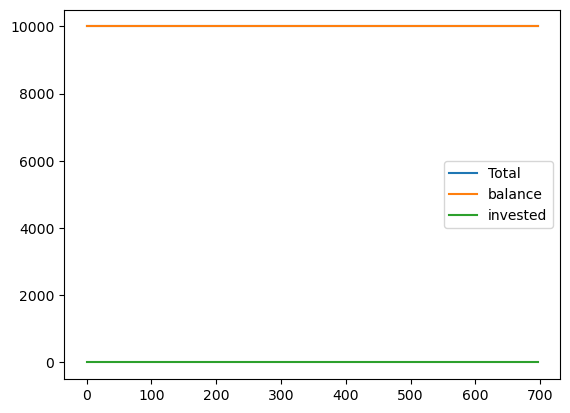

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

states = np.array(states)
print(states.shape)
print(states[:, :-1, 1].shape)

total_invested = np.sum(states[:, :-1, 1], axis = 1)
balance = states[:, -1, 0]
print(balance.shape)
print(total_invested.shape)
net_worth = balance + total_invested
print(net_worth.shape)

plt.plot(net_worth, label='Total')
plt.plot(balance, label = 'balance')
plt.plot(total_invested, label ='invested')
# plt.plot(rewards, label = 'rewards')
plt.legend()
plt.show()

(696, 98)



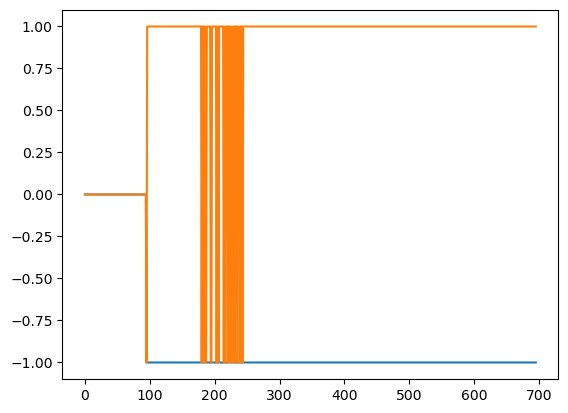

In [ ]:

actions = np.array(actions)
print(actions.shape)
print()
plt.plot(actions[:, 10:12])